<a href="https://colab.research.google.com/github/Lucas-Buk/Introducao-Ciencia-de-Dados/blob/master/Aula_1_Explora%C3%A7%C3%A3o_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gitly

In [ ]:
!pip install pycep-correios

In [151]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter(renderer='github')

# Carregamento dos CSVs

In [152]:
import pandas as pd
import plotly.express as px

In [153]:
df_clientes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Intro à CD/Datasets/olist_sellers_dataset.csv')

# Exploração Datasets

## Dataset Clientes - olist_customers_dataset

In [154]:
df_clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


### Informação - Estrutura da tabela

In [155]:
# Tamanho do dataset
df_clientes.shape

(99441, 5)

In [156]:
# valores unicos em cada coluna
df_clientes.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [157]:
# nunique = qtd. valores unicos na coluna
# count = qtd. valores n]ao nulos na coluna
# size = qtd. de elemetos
df_clientes.agg(['nunique', 'count', 'size'])

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
nunique,99441,96096,14994,4119,27
count,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441


### Informação - Negócio

In [158]:
# Quantas cidades diferentes temos no dataset
print(f'Número de cidades únicas: {len(df_clientes.customer_city.unique())}')

Número de cidades únicas: 4119


In [159]:
# Quantos estados diferentes temos no dataset
print(f'Número de estados únicos: {len(df_clientes.customer_state.unique())}')

Número de estados únicos: 27


In [160]:
# Total de clientes
print(f'Número de clientes únicos: {df_clientes.customer_unique_id.nunique()}')

Número de clientes únicos: 96096


In [161]:
# Total de clientes por cidade
df_clientes_unicos = df_clientes.drop_duplicates('customer_unique_id')
df_clientes_unicos.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Cidades

In [162]:
df_top5_cidades = df_clientes_unicos.customer_city.value_counts().head(5)
df_top5_cidades

sao paulo         14971
rio de janeiro     6611
belo horizonte     2671
brasilia           2066
curitiba           1462
Name: customer_city, dtype: int64

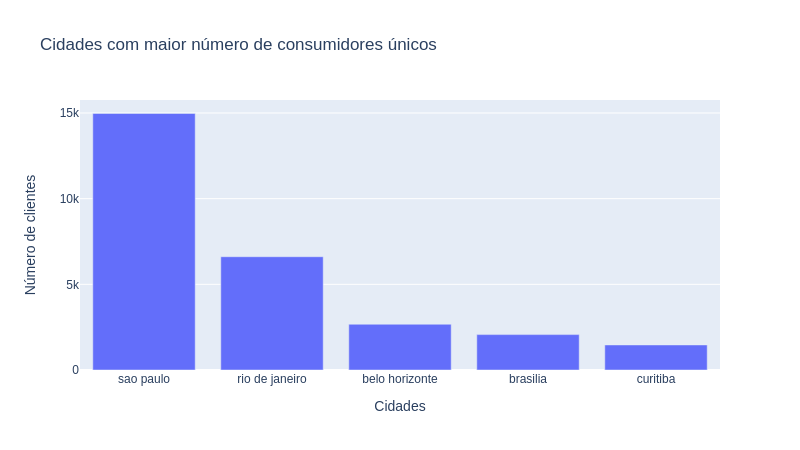

In [163]:
fig = px.bar(df_top5_cidades, y='customer_city', labels={'customer_city': 'Número de clientes', 'index': 'Cidades'}, title='Cidades com maior número de consumidores únicos')
gitly.show(fig)

Estados

In [164]:
df_top5_estados = df_clientes_unicos.customer_state.value_counts().head(5)
df_top5_estados

SP    40295
RJ    12377
MG    11255
RS     5277
PR     4882
Name: customer_state, dtype: int64

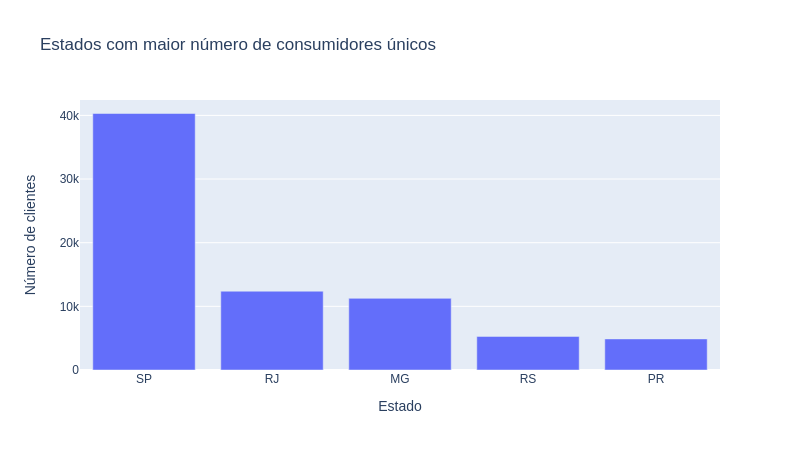

In [165]:
fig = px.bar(df_top5_estados, y='customer_state', labels={'customer_state': 'Número de clientes', 'index': 'Estado'}, title='Estados com maior número de consumidores únicos')
gitly.show(fig)

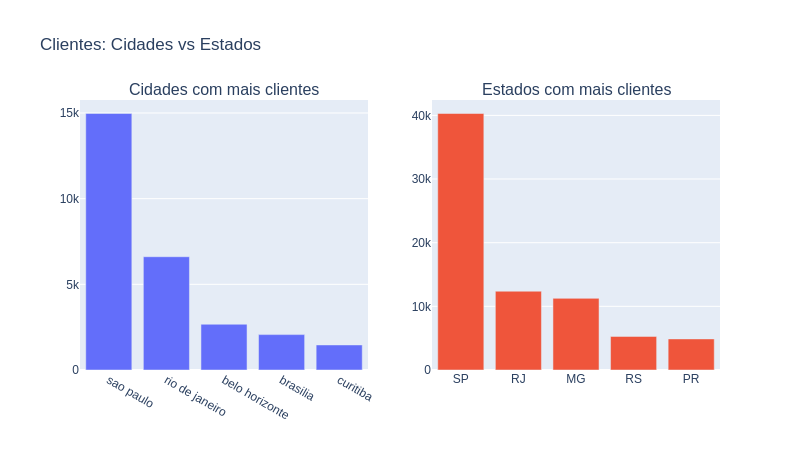

In [166]:
from plotly.subplots import make_subplots

fig = make_subplots( rows=1, cols=2, column_titles= ['Cidades com mais clientes', 'Estados com mais clientes'] )

fig.add_bar(x=df_top5_cidades.index, y=df_top5_cidades, row=1, col=1)
fig.add_bar(x=df_top5_estados.index, y=df_top5_estados, row=1, col=2)
fig.update_layout(dict({'title':'Clientes: Cidades vs Estados'}))
fig.update_layout(dict({'showlegend':False}))
gitly.show(fig)

Bairro/Distrito

In [167]:
df_top4_bairros = df_clientes_unicos.customer_zip_code_prefix.value_counts().head(4).rename('qtd_clientes_bairro').reset_index()
df_top4_bairros

,index,qtd_clientes_bairro
0,22790,136
1,22793,119
2,24220,113
3,24230,112


In [168]:
import pycep_correios

def bairro_cidade(cep):
    end = pycep_correios.get_address_from_cep(str(cep) + '000')
    return '{} / {}'.format(end['bairro'], end['cidade'])

df_top4_bairros['distrito'] = df_top4_bairros['index'].apply(bairro_cidade)
df_top4_bairros

,index,qtd_clientes_bairro,distrito
0,22790,136,Recreio dos Bandeirantes / Rio de Janeiro
1,22793,119,Barra da Tijuca / Rio de Janeiro
2,24220,113,Icaraí / Niterói
3,24230,112,Icaraí / Niterói


## Dataset Produtos - olist_products_dataset

In [169]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


### Informação - Estrutura da tabela

In [170]:
# Tamanho do dataset
df_produtos.shape

(32951, 9)

In [171]:
df_produtos.agg(['nunique', 'count', 'size'])

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,73,66,2960,19,2204,99,102,95
count,32951,32341,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


In [172]:
df_produtos.product_category_name.fillna(value='nao informado', inplace=True)
df_produtos.agg(['nunique', 'count', 'size'])

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,74,66,2960,19,2204,99,102,95
count,32951,32951,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


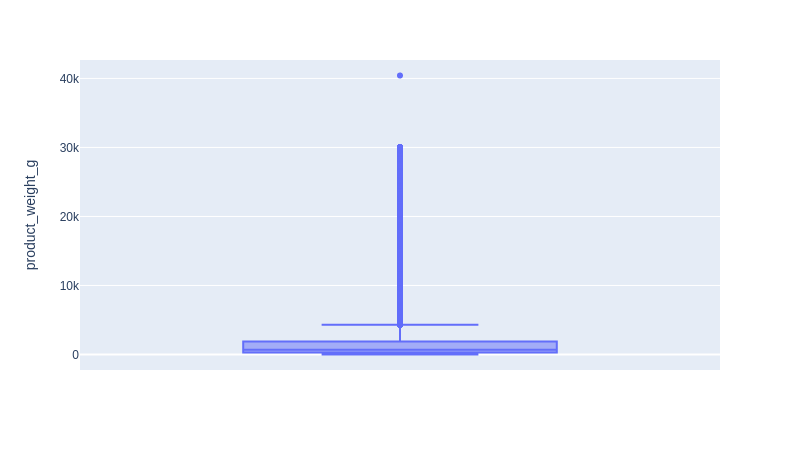

In [173]:
# Como está a distribuição?
fig = px.box(df_produtos.product_weight_g, y="product_weight_g")
gitly.show(fig)

In [174]:
#df_produtos.fillna(method='ffil')
#df_produtos.fillna(value=0)
valor = df_produtos.product_weight_g.median()
df_produtos.product_weight_g.fillna(value=valor,inplace=True)

### Informação - Negócio

In [175]:
# Número de categorias
print(f'Número de categorias: {len(df_produtos.product_category_name.unique())}')

Número de categorias: 74


In [176]:
# Categorias mais ofertadas
df_categoria = df_produtos.product_category_name.value_counts().head(5).rename('qtd_prod_cat_ofertados')
df_categoria

cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: qtd_prod_cat_ofertados, dtype: int64

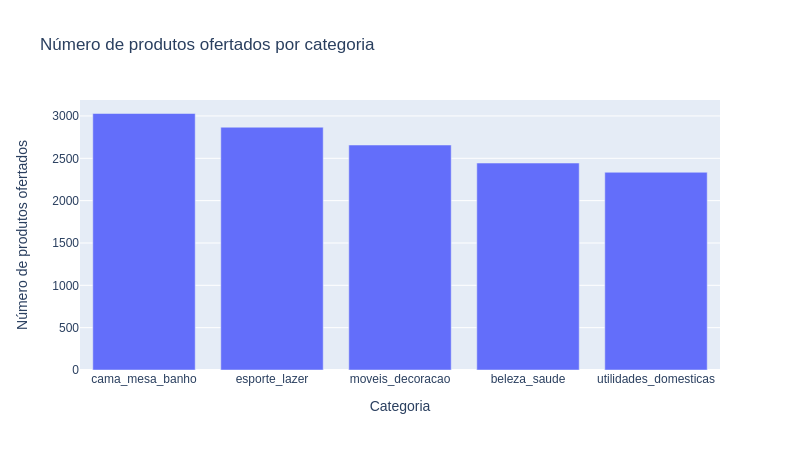

In [177]:
fig = px.bar(df_categoria, y='qtd_prod_cat_ofertados', labels={'qtd_prod_cat_ofertados': 'Número de produtos ofertados', 'index': 'Categoria'}, title='Número de produtos ofertados por categoria')
gitly.show(fig)

In [178]:
# Peso médio dos produtos
print(f'Peso médio dos produtos: {df_produtos.product_weight_g.mean()/1000:.2f}kg')

Peso médio dos produtos: 2.28kg


In [179]:
import numpy as np

df_peso_medio_prods = df_produtos.groupby(by = 'product_category_name').apply(np.mean).product_weight_g
df_peso_medio_prods.head(5)

product_category_name
agro_industria_e_comercio    5263.405405
alimentos                     923.414634
alimentos_bebidas            1307.932692
artes                        1691.763636
artes_e_artesanato           1164.578947
Name: product_weight_g, dtype: float64

In [180]:
df_mais_ofer_peso_medio = pd.merge(left=df_categoria, right=df_peso_medio_prods, how='left', left_index=True, right_index=True)
df_mais_ofer_peso_medio

,qtd_prod_cat_ofertados,product_weight_g
cama_mesa_banho,3029,2456.405084
esporte_lazer,2867,2024.670736
moveis_decoracao,2657,3008.266842
beleza_saude,2444,1434.793781
utilidades_domesticas,2335,3020.793576


In [181]:
# Comprimento médio dos produtos
print(f'Comprimento médio dos produtos: {df_produtos.product_length_cm.mean():.2f}cm')

Comprimento médio dos produtos: 30.82cm


In [182]:
# Altura média dos produtos
print(f'Altura média dos produtos: {df_produtos.product_height_cm.mean():.2f}cm')

Altura média dos produtos: 16.94cm


In [183]:
# Largura média dos produtos
print(f'Largura média dos produtos: {df_produtos.product_width_cm.mean():.2f}cm')

Largura média dos produtos: 23.20cm


In [184]:
# Volume médio dos produtos
df_produtos['product_volume_cm3'] = df_produtos.product_length_cm*df_produtos.product_height_cm*df_produtos.product_width_cm
df_produtos.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0


In [185]:
df_vol_medio_prods = df_produtos.groupby(by = 'product_category_name').apply(np.mean).product_volume_cm3
df_vol_medio_prods.head(3)

product_category_name
agro_industria_e_comercio    37604.229730
alimentos                     6634.121951
alimentos_bebidas             7947.163462
Name: product_volume_cm3, dtype: float64

In [186]:
df_mais_ofer_peso_volume_medio = pd.merge(left=df_mais_ofer_peso_medio, right=df_vol_medio_prods, how='left', left_index=True, right_index=True)
df_mais_ofer_peso_volume_medio

,qtd_prod_cat_ofertados,product_weight_g,product_volume_cm3
cama_mesa_banho,3029,2456.405084,18594.577088
esporte_lazer,2867,2024.670736,14725.348797
moveis_decoracao,2657,3008.266842,22481.225442
beleza_saude,2444,1434.793781,10468.159165
utilidades_domesticas,2335,3020.793576,21904.167880


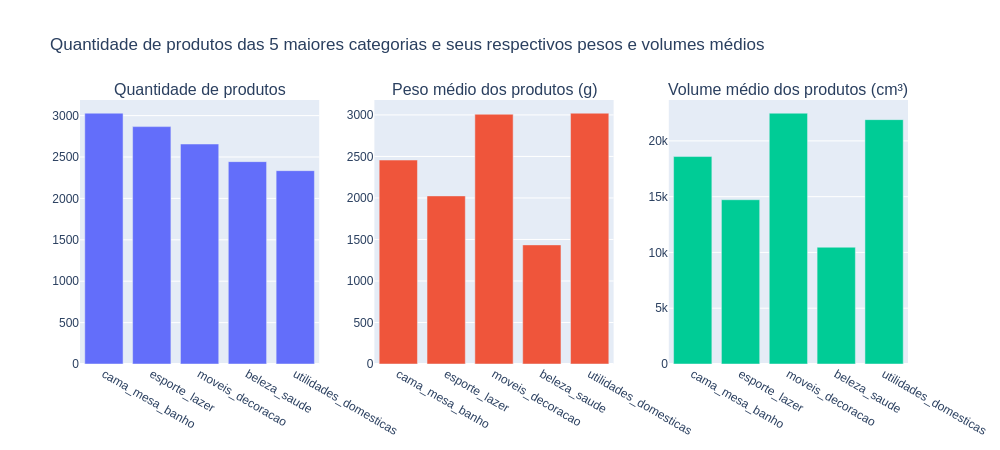

In [187]:
fig = make_subplots(rows=1, cols=3, column_titles= ['Quantidade de produtos', 'Peso médio dos produtos (g)', 'Volume médio dos produtos (cm³)'])

fig.add_bar(x=df_mais_ofer_peso_volume_medio.index, y=df_mais_ofer_peso_volume_medio.qtd_prod_cat_ofertados, row=1, col=1)
fig.add_bar(x=df_mais_ofer_peso_volume_medio.index, y=df_mais_ofer_peso_volume_medio.product_weight_g, row=1, col=2)
fig.add_bar(x=df_mais_ofer_peso_volume_medio.index, y=df_mais_ofer_peso_volume_medio.product_volume_cm3, row=1, col=3)
fig.update_layout(dict({'title':'Quantidade de produtos das 5 maiores categorias e seus respectivos pesos e volumes médios'}))
fig.update_layout(dict({'showlegend':False}))
gitly.show(fig, width = 1000)

## Dataset Compras - olist_orders_dataset

In [188]:
df_compras.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


### Informação - Estrutura da tabela

In [189]:
# Tamanho do dataset
df_compras.shape

(99441, 8)

In [190]:
df_compras.agg(['nunique', 'count', 'size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90733,81018,95664,459
count,99441,99441,99441,99441,99281,97658,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [191]:
df_compras.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [192]:
df_compras_dt = df_compras[['order_id', 'customer_id', 'order_status']].copy()
df_compras_dt.head(2)

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered


In [193]:
lista_colunas_datas = list(df_compras.iloc[:1, 3:].columns)
lista_colunas_datas

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [194]:
for coluna in lista_colunas_datas:
    df_compras_dt[coluna] = pd.to_datetime(df_compras[coluna], format='%Y-%m-%d')

df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [195]:
df_compras_dt.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [196]:
df_compras_dt.iloc[0,:]

order_id                         e481f51cbdc54678b7cc49136f2d6af7
customer_id                      9ef432eb6251297304e76186b10a928d
order_status                                            delivered
order_purchase_timestamp                      2017-10-02 10:56:33
order_approved_at                             2017-10-02 11:07:15
order_delivered_carrier_date                  2017-10-04 19:55:00
order_delivered_customer_date                 2017-10-10 21:25:13
order_estimated_delivery_date                 2017-10-18 00:00:00
Name: 0, dtype: object

In [197]:
media_compra_confirm = (df_compras_dt.order_approved_at - df_compras_dt.order_purchase_timestamp).mean().round('S')
media_compra_confirm

Timedelta('0 days 10:25:09')

In [198]:
df_compras_dt.order_approved_at.fillna(value=df_compras_dt.order_purchase_timestamp + media_compra_confirm, inplace=True)
df_compras_dt.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90893,81018,95664,459
count,99441,99441,99441,99441,99441,97658,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [199]:
media_aprov_transp = (df_compras_dt.order_delivered_carrier_date - df_compras_dt.order_approved_at).mean().round('S')
media_aprov_transp

Timedelta('2 days 19:19:34')

In [200]:
df_compras_dt.order_delivered_carrier_date.fillna(value=df_compras_dt.order_approved_at + media_aprov_transp, inplace=True)
df_compras_dt.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90893,82795,95664,459
count,99441,99441,99441,99441,99441,99441,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [201]:
media_transp_deliv = (df_compras_dt.order_delivered_customer_date - df_compras_dt.order_delivered_carrier_date).mean().round('S')
media_transp_deliv

Timedelta('9 days 07:56:35')

In [202]:
df_compras_dt.order_delivered_customer_date.fillna(value=df_compras_dt.order_delivered_carrier_date + media_transp_deliv, inplace=True)
df_compras_dt.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90893,82795,98617,459
count,99441,99441,99441,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


### Informação - Negócio

In [203]:
df_compras_dt.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [204]:
# Tipos e quantidade do status do pedido
df_status = df_compras_dt.order_status.value_counts()
df_status

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

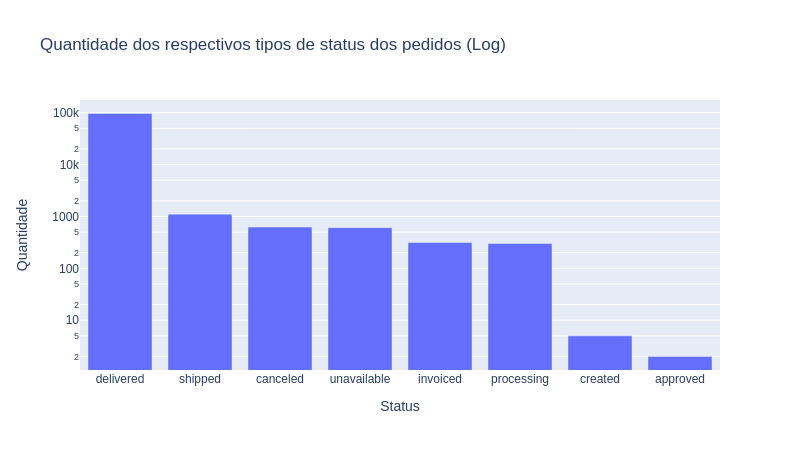

In [205]:
fig = px.bar(df_status, y='order_status', log_y=True, labels={'order_status': 'Quantidade', 'index': 'Status'}, 
             title= 'Quantidade dos respectivos tipos de status dos pedidos (Log)')
gitly.show(fig)

In [206]:
em_tempo = (df_compras_dt.order_delivered_customer_date <= df_compras_dt.order_estimated_delivery_date).sum()
em_tempo

91318

In [207]:
total = (df_compras_dt.order_delivered_customer_date <= df_compras_dt.order_estimated_delivery_date).count()
total

99441

In [208]:
atrasados = total - em_tempo
atrasados

8123

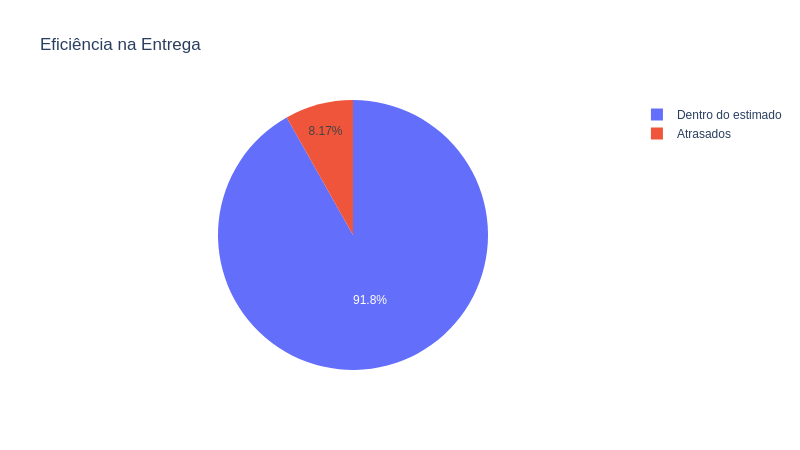

In [209]:
fig = px.pie(values=[em_tempo,atrasados], names=['Dentro do estimado', 'Atrasados'], title='Eficiência na Entrega')
gitly.show(fig)

In [210]:
df_compras_dt['delivery_interval'] = df_compras_dt.order_delivered_customer_date - df_compras_dt.order_purchase_timestamp
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40


In [211]:
df_compras_dt['numeric_month'] = df_compras_dt.order_purchase_timestamp.dt.month
df_compras_dt['month'] = df_compras_dt.order_purchase_timestamp.dt.month_name()
df_compras_dt['year'] = df_compras_dt.order_purchase_timestamp.dt.year
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018


In [212]:
df_compras_dt['days_delivery_interval'] = df_compras_dt.delivery_interval.dt.days
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018,9


In [213]:
df_compras_mes = df_compras_dt[['numeric_month','year','days_delivery_interval']].groupby(by='numeric_month').apply(np.mean)
df_compras_mes

,numeric_month,year,days_delivery_interval
numeric_month,,,
1,1.0,2017.900855,13.464370
2,2.0,2017.790785,15.623531
3,3.0,2017.728899,14.847064
4,4.0,2017.742695,11.894681
5,5.0,2017.650052,10.924336
6,6.0,2017.655227,9.752975
7,7.0,2017.609808,9.595077
8,8.0,2017.600572,8.743890
9,9.0,2017.002787,11.468060


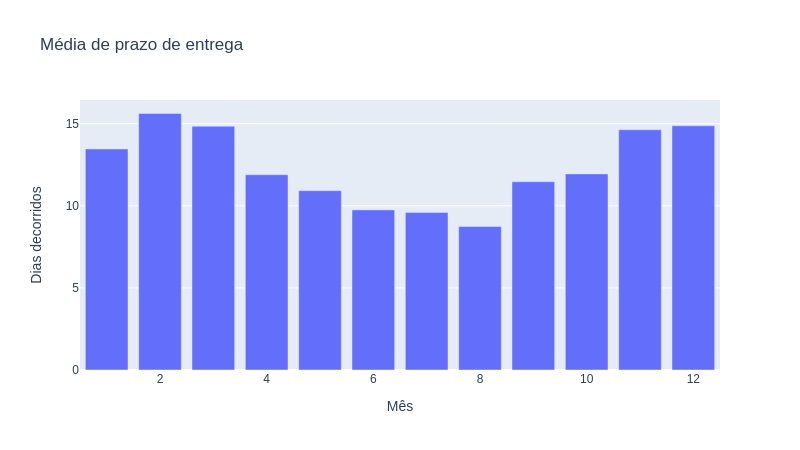

In [214]:
fig = px.bar(df_compras_mes, y='days_delivery_interval', title='Média de prazo de entrega', 
             labels={'days_delivery_interval': 'Dias decorridos', 'index':'Mês'})
gitly.show(fig)

In [215]:
df_n_compras_mes = df_compras_dt.numeric_month.value_counts()
df_n_compras_mes_plot = df_n_compras_mes.reset_index().sort_values(by='index', ascending=True)
df_n_compras_mes_plot

,index,numeric_month
7,1,8069
6,2,8508
3,3,9893
5,4,9343
1,5,10573
4,6,9412
2,7,10318
0,8,10843
11,9,4305
10,10,4959


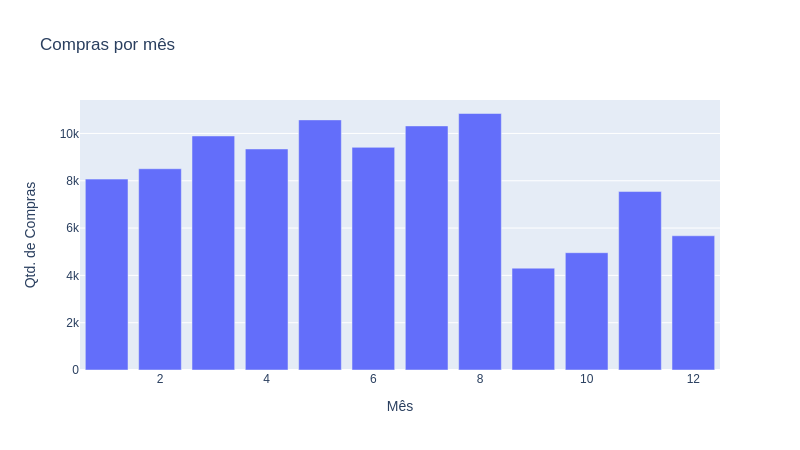

In [216]:
fig = px.bar(df_n_compras_mes_plot, x ='index' , y='numeric_month', title='Compras por mês', labels={'numeric_month': 'Qtd. de Compras', 'index':'Mês'})
gitly.show(fig)

In [217]:
df_compras_dt.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [218]:
df_compras_dt.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

## Dataset Itens - olist_order_items_dataset

In [219]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


### Informação - Estrutura da tabela

In [220]:
# Tamanho do dataset
df_compra_itens.shape

(112650, 7)

In [221]:
df_compra_itens.agg(['nunique','count','size'])

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
nunique,98666,21,32951,3095,93318,5968,6999
count,112650,112650,112650,112650,112650,112650,112650
size,112650,112650,112650,112650,112650,112650,112650


### Informação - Negócio

In [222]:
# Número de pedidos únicos
print(f'Número de pedidos: {len(df_compra_itens.order_id.unique())}')

Número de pedidos: 98666


In [223]:
# Número de produtos
print(f'Número de produtos: {len(df_compra_itens.product_id.unique())}')

Número de produtos: 32951


In [224]:
# Quantidade de vendedores
print(f'Número de vendedores: {len(df_compra_itens.seller_id.unique())}')

Número de vendedores: 3095


In [225]:
# Preço médio das compras
print(f'Preço médio de todas as compras: R${df_compra_itens.price.mean():.2f}')

Preço médio de todas as compras: R$120.65


In [226]:
# Maiores vendedores
df_vendas = df_compra_itens.groupby(by='seller_id').price.sum().sort_values(ascending=False)
df_mais_vendas = df_vendas.head(5)
df_mais_vendas

seller_id
4869f7a5dfa277a7dca6462dcf3b52b2    229472.63
53243585a1d6dc2643021fd1853d8905    222776.05
4a3ca9315b744ce9f8e9374361493884    200472.92
fa1c13f2614d7b5c4749cbc52fecda94    194042.03
7c67e1448b00f6e969d365cea6b010ab    187923.89
Name: price, dtype: float64

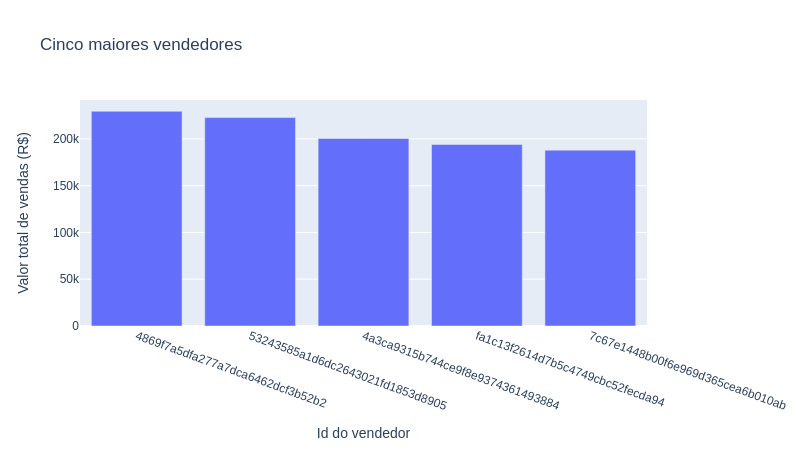

In [227]:
fig = px.bar(df_mais_vendas, y='price', labels={'price': 'Valor total de vendas (R$)', 'seller_id': 'Id do vendedor'}, title= 'Cinco maiores vendedores')
fig.update_xaxes(tickangle = 20)
gitly.show(fig)

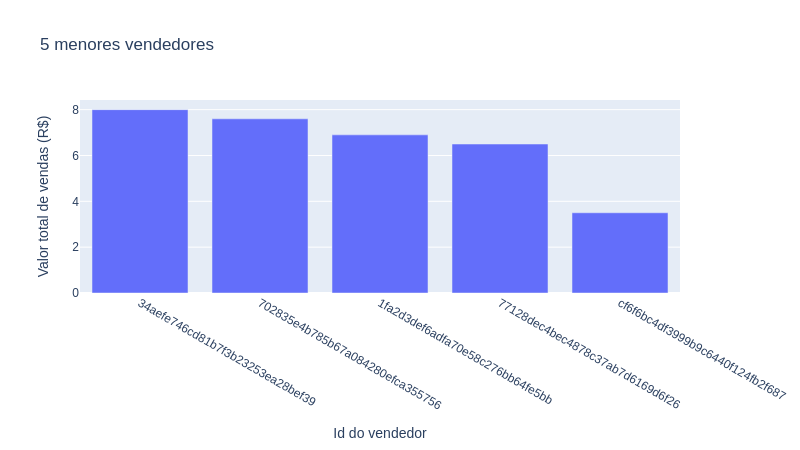

In [228]:
df_menos_vendas = df_vendas.tail()

fig = px.bar(df_menos_vendas, y='price', labels={'price': 'Valor total de vendas (R$)', 'seller_id': 'Id do vendedor'}, title= '5 menores vendedores')
gitly.show(fig)

In [229]:
# Preço médio do frete das compras
print(f'Preço médio do frete de todas as compras: R${df_compra_itens.freight_value.mean():.2f}')

Preço médio do frete de todas as compras: R$19.99


In [230]:
# Preço médio total das compras (preço do produto + frete)
preço_total = df_compra_itens.price.mean() + df_compra_itens.freight_value.mean()
print(f'Preço médio total da compra: R${preço_total:.2f}')

Preço médio total da compra: R$140.64


## Dataset Vendedores - olist_sellers_dataset

In [231]:
df_vendedores.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


### Informação - Estrutura da tabela

In [232]:
# Tamanho do dataset
df_vendedores.shape

(3095, 4)

In [233]:
df_vendedores.agg(['nunique','count','size'])

,seller_id,seller_zip_code_prefix,seller_city,seller_state
nunique,3095,2246,611,23
count,3095,3095,3095,3095
size,3095,3095,3095,3095


### Informação - Negócio

In [234]:
# Total de cidades dos vendedores
print(f'Total de cidades dos vendedores cadastradas: {len(df_vendedores.seller_city.unique())}')

Total de cidades dos vendedores cadastradas: 611


In [235]:
# Total de estados dos vendedores
print(f'Total de estados dos vendedores cadastradas: {len(df_vendedores.seller_state.unique())}')

Total de estados dos vendedores cadastradas: 23


## Dataset Reviews - olist_order_reviews_dataset

In [236]:
df_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


### Informação - Estrutura da tabela

In [237]:
# Tamanho do dataset
df_reviews.shape

(100000, 7)

In [238]:
df_reviews.agg(['nunique','count','size'])

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
nunique,99173,99441,5,4600,36921,637,99010
count,100000,100000,100000,11715,41753,100000,100000
size,100000,100000,100000,100000,100000,100000,100000


### Informação - Negócio

In [239]:
df_reviews.review_id.value_counts().head(5)

832acec9bbf4efe65c3fb6423d8b4ed7    3
c444278834184f72b1484dfe47de7f97    3
2d6ac45f859465b5c185274a1c929637    3
7b606b0d57b078384f0b58eac1d41d78    3
1fb4ddc969e6bea80e38deec00393a6f    3
Name: review_id, dtype: int64

In [240]:
df_reviews_unicos = df_reviews.drop_duplicates('review_id')
df_reviews_unicos.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [241]:
df_notas = df_reviews_unicos.review_score.value_counts()
df_notas

5    57000
4    19062
1    11712
3     8203
2     3196
Name: review_score, dtype: int64

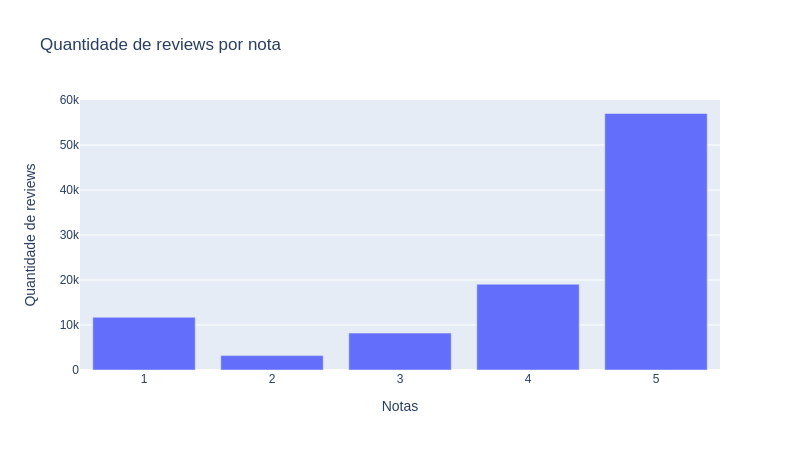

In [242]:
fig = px.bar(df_notas, y='review_score', title= 'Quantidade de reviews por nota',
             labels={'review_score': 'Quantidade de reviews', 'index': 'Notas'})
gitly.show(fig)

In [243]:
df_reviews_unicos_dt = df_reviews_unicos[['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message']].copy()
df_reviews_unicos_dt.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN


In [244]:
lista_datas = ['review_creation_date', 'review_answer_timestamp']

In [245]:
for coluna in lista_datas:
    df_reviews_unicos_dt[coluna] = pd.to_datetime(df_reviews_unicos[coluna], format='%Y-%m-%d')

df_reviews_unicos_dt.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24


In [246]:
df_reviews_unicos_dt.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [247]:
df_reviews_unicos_dt['time_answer_review'] = df_reviews_unicos_dt.review_answer_timestamp - df_reviews_unicos_dt.review_creation_date
df_reviews_unicos_dt.sample(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,time_answer_review
94973,c001e76f7230ceefa2a4a8e3d96981fa,f5d4aae78e79c2093f0dc0e73c34ab58,5,NaN,NaN,2018-01-18,2018-01-20 23:01:29,2 days 23:01:29
18649,50f2a3bf15878aff86b335d0c58863d5,c186ae09d4d6b5291940be29b05cc169,5,NaN,Estou satisfeita com o produto,2017-09-28,2017-09-29 01:46:14,1 days 01:46:14
10074,8fbd9b5bf6e46b1d1c725b71304ac6e3,95962f933dc8f1cffffaf4fed75d2a5f,4,NaN,recomendo,2017-12-22,2017-12-23 10:47:19,1 days 10:47:19


In [248]:
print(f"Tempo médio para resposta ao review {df_reviews_unicos_dt.time_answer_review.mean().round('S')}")

Tempo médio para resposta ao review 3 days 03:34:17


In [249]:
df_reviews_unicos_dt.time_answer_review.min()

Timedelta('0 days 02:08:29')

In [250]:
df_reviews_unicos_dt.time_answer_review.max()

Timedelta('518 days 16:46:52')

In [251]:
df_reviews_unicos_dt.time_answer_review.median()

Timedelta('1 days 16:09:04')

## Dataset Pagamentos - olist_order_payments_dataset

In [252]:
df_compra_pagamentos.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


### Informação - Estrutura da tabela

In [253]:
# Tamanho do dataset
df_compra_pagamentos.shape

(103886, 5)

In [254]:
df_compra_pagamentos.agg(['nunique','count','size'])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
nunique,99440,29,5,24,29077
count,103886,103886,103886,103886,103886
size,103886,103886,103886,103886,103886


### Informação - Negócio

In [255]:
df_parcelas = df_compra_pagamentos.payment_installments.value_counts()
df_parcelas.head(8)

1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
Name: payment_installments, dtype: int64

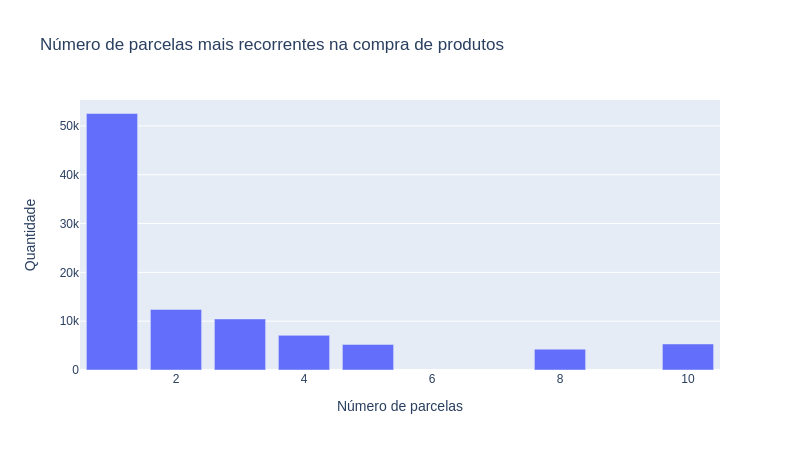

In [256]:
fig = px.bar(df_parcelas.head(7), y='payment_installments', title= 'Número de parcelas mais recorrentes na compra de produtos', 
             labels={'index': 'Número de parcelas', 'payment_installments': 'Quantidade'})
gitly.show(fig)

In [257]:
# Pagamento médio
print(f'Valor médio de pagamento total: R${df_compra_pagamentos.payment_value.mean():.2f}')

Valor médio de pagamento total: R$154.10


In [258]:
df_metodo_pag = df_compra_pagamentos.payment_type.value_counts()
df_metodo_pag

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

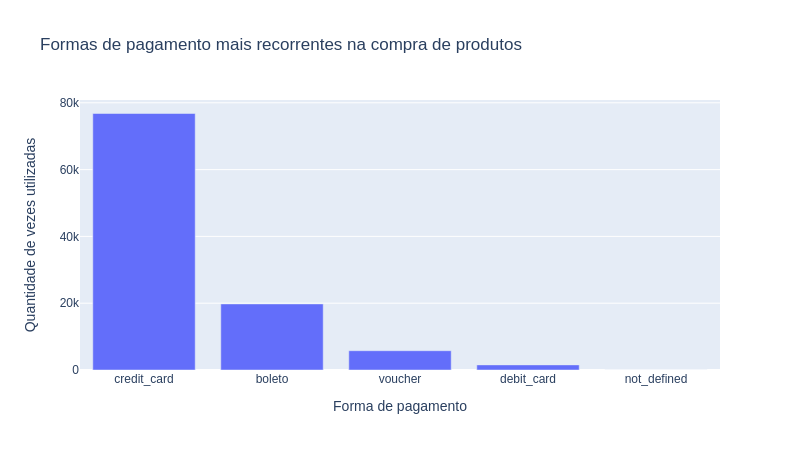

In [259]:
fig = px.bar(df_metodo_pag, y='payment_type', title= 'Formas de pagamento mais recorrentes na compra de produtos',
             labels = {'index':'Forma de pagamento', 'payment_type':'Quantidade de vezes utilizadas'})
gitly.show(fig)

In [260]:
# Parcelas por método de pagamento
df_compra_pagamentos.groupby(['payment_installments','payment_type']).count().head(8)

order_id  payment_sequential  payment_value
payment_installments payment_type                                             
0                    credit_card          2                   2              2
1                    boleto           19784               19784          19784
                     credit_card      25455               25455          25455
                     debit_card        1529                1529           1529
                     not_defined          3                   3              3
                     voucher           5775                5775           5775
2                    credit_card      12413               12413          12413
3                    credit_card      10461               10461          10461

## Dataset Geo - olist_geolocation_dataset

In [261]:
df_geo.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


### Informação - Estrutura da tabela

In [262]:
# Tamanho do dataset
df_geo.shape

(1000163, 5)

In [263]:
df_geo.agg(['nunique','count','size'])

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
nunique,19015,717358,717613,8011,27
count,1000163,1000163,1000163,1000163,1000163
size,1000163,1000163,1000163,1000163,1000163


### Informação - Negócio

In [264]:
df_estados = df_geo.geolocation_state.value_counts()
df_estados.head(5)

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
Name: geolocation_state, dtype: int64

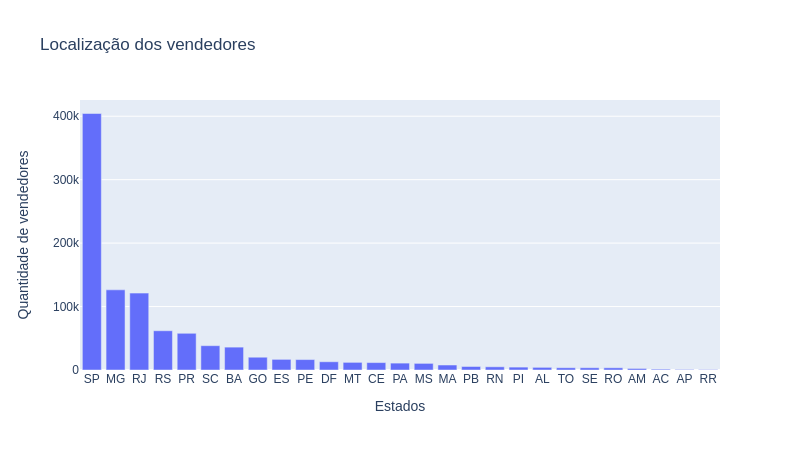

In [265]:
fig = px.bar(df_estados, y = 'geolocation_state', title='Localização dos vendedores',
             labels={'index':'Estados','geolocation_state':'Quantidade de vendedores'})
gitly.show(fig)